# Matplotlib - Practice

[Matplotlib Documentation](https://matplotlib.org/stable/api/index.html)

## Coverage

- 2 ways of creating plots
- Plotting with NumPy arrays
- Plotting with Pandas data using OO method
- Customizing plots
- Saving plots

## 0. Import Matplotlib

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Two Ways of Creating Plots

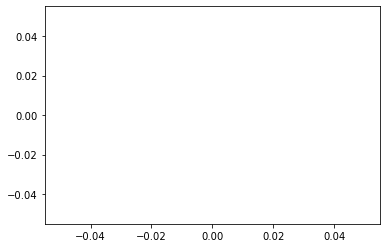

In [9]:
plt.plot() # 세미콜론을 붙여야 빈 리스트 ([]) 출력이 되지 않음
plt.show() # show()를 실행한다면 plot()에 세미콜론 필요 없음

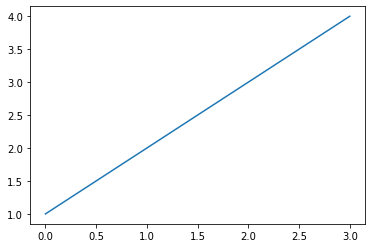

In [12]:
plt.plot([1, 2, 3, 4])
plt.show()

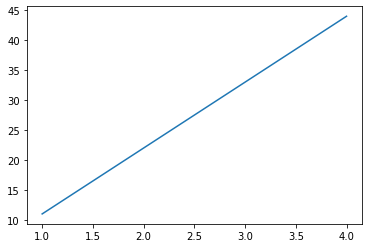

In [13]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)
plt.show()

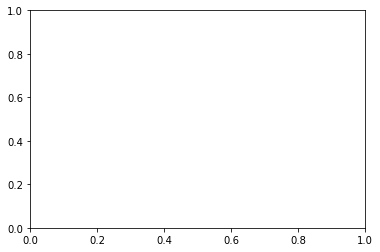

In [16]:
# 방법 1
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

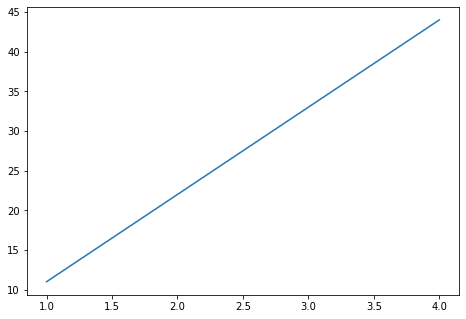

In [17]:
# 방법 2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

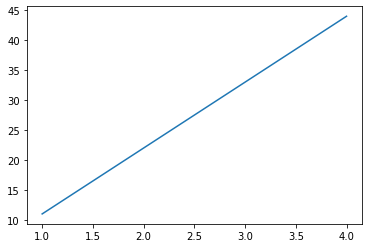

In [20]:
# 방법 3
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show() # 이 방법이 가장 직관적 -> 가장 많이 사용

In [22]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

### 1.1. Matplotlib Workflow

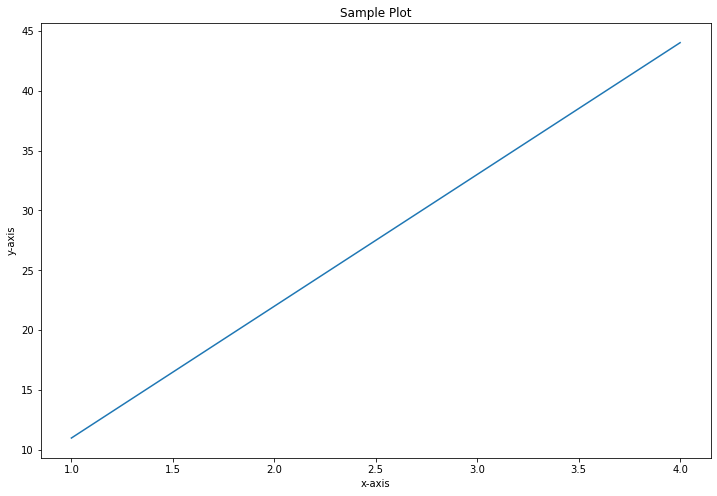

In [23]:
# 0. Import matplotlib
import matplotlib.pyplot as plt

# 1. 데이터 준비
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. fig, ax 준비 -> plt.subplots()
fig, ax = plt.subplots(figsize=(12, 8)) # figsize 설정 가능

# 3. 데이터 플롯 -> ax.plot()
ax.plot(x, y)

# 4. 플롯 커스터마이즈 -> ax.set()
ax.set(title='Sample Plot', xlabel='x-axis', ylabel='y-axis')

# 5. 저장 및 출력 -> plt.show(), fig.savefig()
plt.show()
fig.savefig('../images/simple-plot.png')

## 2. Plotting with NumPy Arrays

- `line`
- `scatter`
- `bar`
- `hist`
- `subplots()`

In [26]:
x = np.linspace(0, 10, 100)
print(len(x))
print(x[:10])

100
[0.         0.1010101  0.2020202  0.3030303  0.4040404  0.50505051
 0.60606061 0.70707071 0.80808081 0.90909091]


### 2.1. `line`

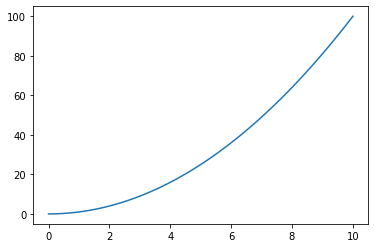

In [28]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
plt.show()

### 2.2. `scatter`

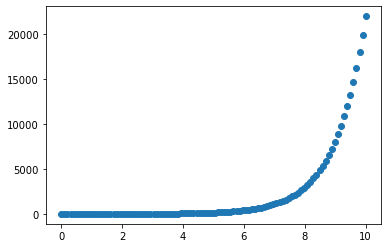

In [31]:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))
plt.show()

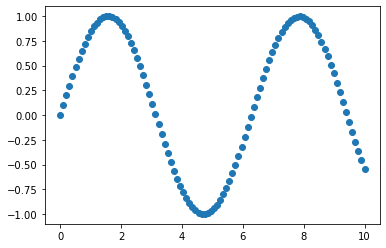

In [32]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))
plt.show()

### 2.3. `bar`

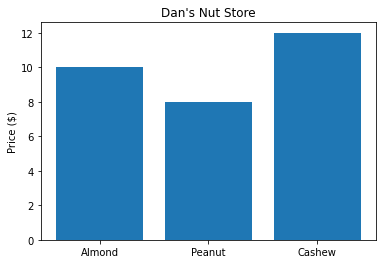

In [34]:
nut_prices = {
    "Almond": 10,
    "Peanut": 8,
    "Cashew": 12
}

fig, ax = plt.subplots()
ax.bar(nut_prices.keys(), nut_prices.values())
ax.set(title="Dan's Nut Store", ylabel="Price ($)")
plt.show()

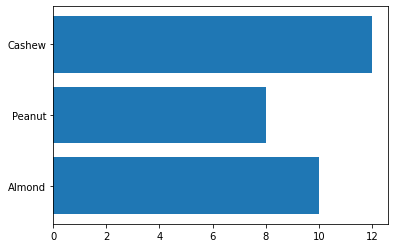

In [36]:
fig, ax = plt.subplots()
ax.barh(list(nut_prices.keys()), list(nut_prices.values())) # barh는 list만 인식
plt.show()

### 2.4. `hist`

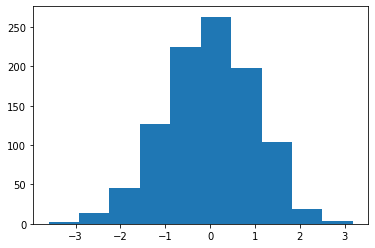

In [37]:
x = np.random.randn(1000) # 정규 분포 난수

fig, ax = plt.subplots()
ax.hist(x)
plt.show()

### 2.5. `subplots`

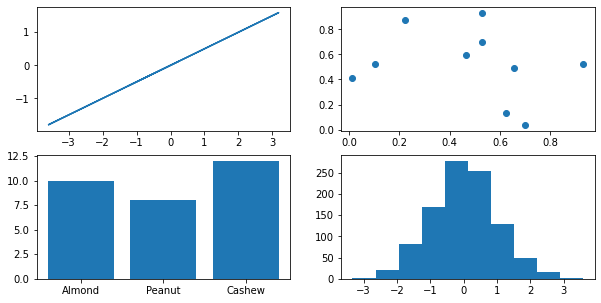

In [38]:
# 옵션 1: ax의 각 이름을 따로 지정
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_prices.keys(), nut_prices.values())
ax4.hist(np.random.randn(1000))
plt.show()

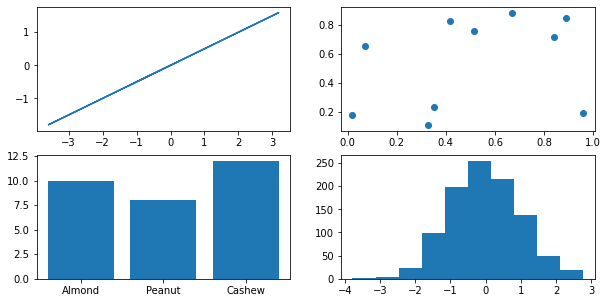

In [39]:
# 옵션 2: axes로 선언 후 위치를 지정(array-like)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].plot(x, x/2)
axes[0, 1].scatter(np.random.random(10), np.random.random(10))
axes[1, 0].bar(nut_prices.keys(), nut_prices.values())
axes[1, 1].hist(np.random.randn(1000))
plt.show()

## 3. Plotting with Pandas Data using OO Method

### 3.1. `line`

In [41]:
ts = pd.Series(
    np.random.randn(1000), 
    index=pd.date_range('1/1/2020', periods=1000)
)
ts

2020-01-01   -1.386631
2020-01-02   -0.292947
2020-01-03    0.035812
2020-01-04    0.138857
2020-01-05   -1.078825
                ...   
2022-09-22   -0.884195
2022-09-23   -0.369077
2022-09-24    0.732816
2022-09-25   -0.334108
2022-09-26   -0.068483
Freq: D, Length: 1000, dtype: float64

In [42]:
ts.cumsum()

2020-01-01    -1.386631
2020-01-02    -1.679578
2020-01-03    -1.643766
2020-01-04    -1.504909
2020-01-05    -2.583735
                ...    
2022-09-22   -12.155298
2022-09-23   -12.524375
2022-09-24   -11.791559
2022-09-25   -12.125667
2022-09-26   -12.194150
Freq: D, Length: 1000, dtype: float64

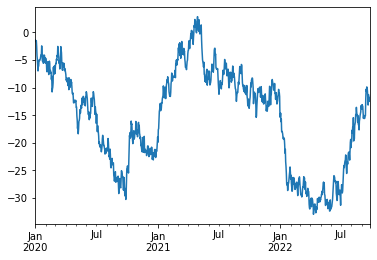

In [43]:
ts.cumsum().plot()
plt.show()

In [51]:
car_sales = pd.read_csv('../data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [52]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')
car_sales['Price'] = car_sales['Price'].str[:-2].astype(int)
car_sales['Sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

<ipython-input-52-48989f5204f0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


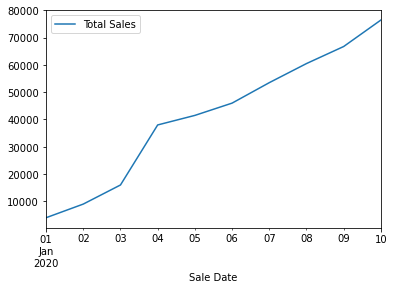

In [54]:
car_sales.plot(x='Sale Date', y='Total Sales')
plt.show()

### 3.2. `scatter`

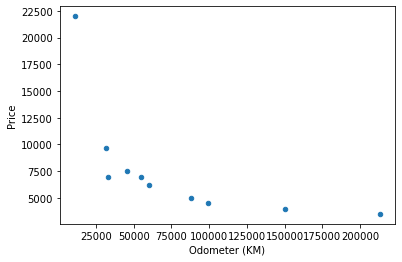

In [55]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter')
plt.show()

### 3.3. `bar`

In [56]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.270257,0.669506,0.223775,0.611123
1,0.103664,0.307525,0.926763,0.943322
2,0.347264,0.045013,0.772684,0.467404
3,0.284598,0.511300,0.284789,0.977103
4,0.305827,0.441746,0.728869,0.980036
5,0.619665,0.600659,0.884669,0.334584
6,0.518337,0.237241,0.085305,0.600216
7,0.185928,0.527825,0.970825,0.356137
8,0.214524,0.708941,0.424982,0.419730
9,0.534367,0.062200,0.789926,0.148245


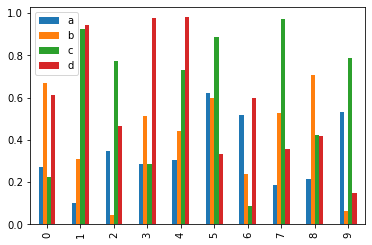

In [58]:
df.plot(kind='bar')
plt.show()

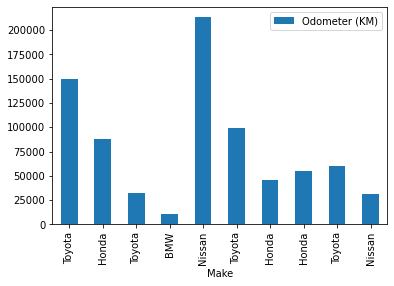

In [59]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar')
plt.show()

### 3.4. `hist`

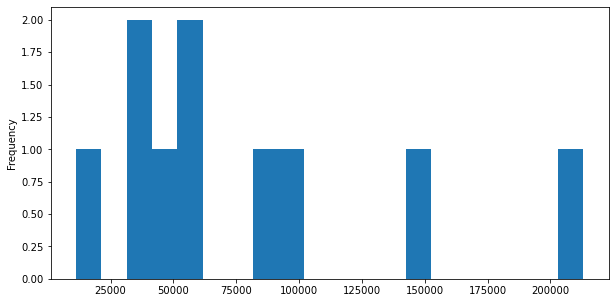

In [64]:
car_sales['Odometer (KM)'].plot(
    kind='hist', 
    bins=20,
    figsize=(10, 5)
)
plt.show()

In [66]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


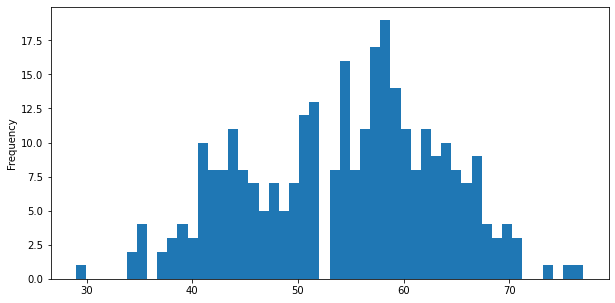

In [68]:
heart_disease['age'].plot(kind='hist', figsize=(10, 5), bins=50)
plt.show()

### 3.5. `subplots`

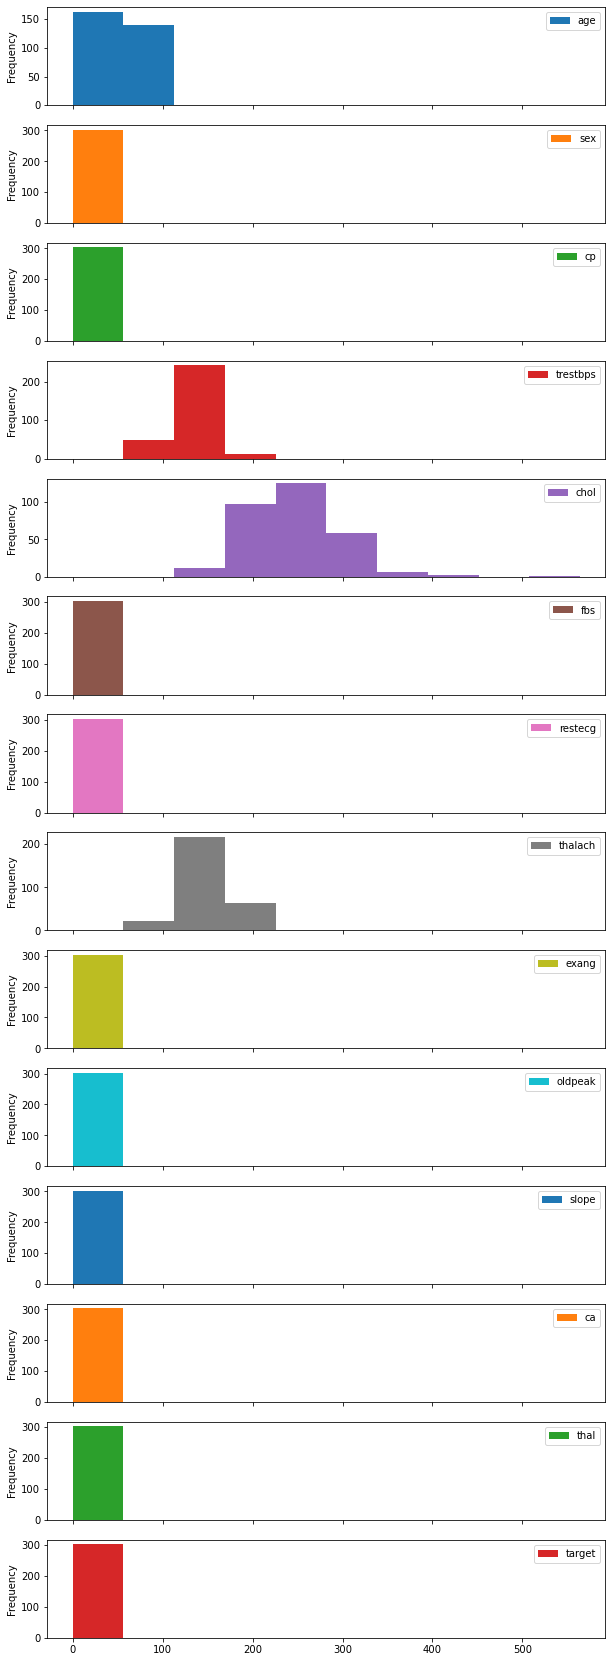

In [70]:
heart_disease.plot(kind='hist', figsize=(10, 30), subplots=True)
plt.show()

In [75]:
over_50 = heart_disease[heart_disease['age'] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


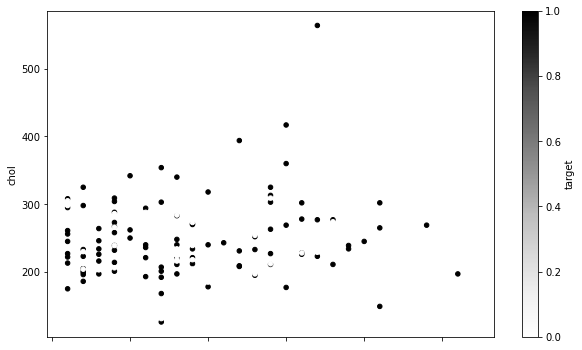

In [79]:
over_50.plot(
    kind='scatter',
    x='age',
    y='chol',
    c='target',
    figsize=(10, 6)
)
plt.show()

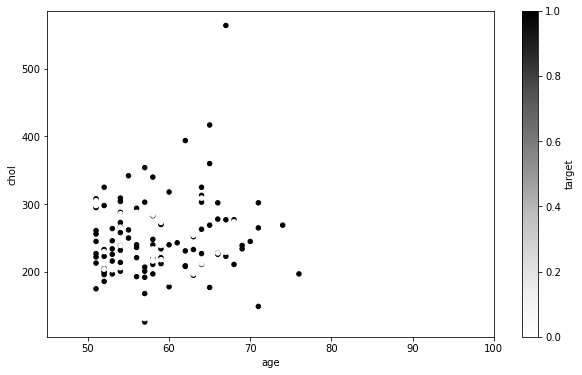

In [80]:
# pyplot의 ax를 사용해서 그릴 수도 있음
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(
    kind='scatter',
    x='age',
    y='chol',
    c='target',
    ax=ax
)
ax.set(xlim=[45, 100])
plt.show()

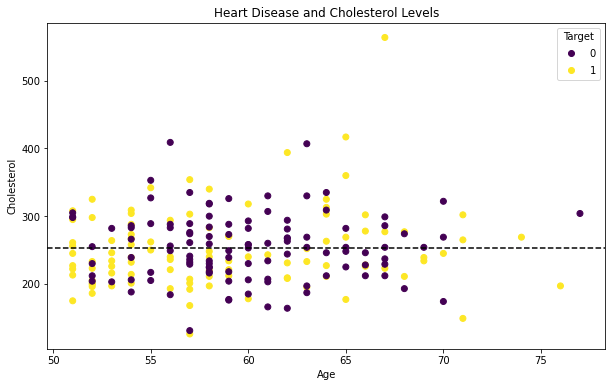

In [84]:
# pyplot으로 조금 더 복잡하지만 명확한 정보를 주는 시각화도 가능
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    x=over_50['age'],
    y=over_50['chol'],
    c=over_50['target'] # color를 df의 칼럼으로 설정하면 해당 데이터에 따른 colorbar 생성
)
ax.set(
    title='Heart Disease and Cholesterol Levels',
    xlabel='Age',
    ylabel='Cholesterol'
)
ax.legend(*scatter.legend_elements(), title='Target')
ax.axhline(over_50['chol'].mean(), linestyle='--', color='black')

plt.show()